In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 1.03.Dummies.csv to 1.03.Dummies.csv


In [4]:
raw_data = pd.read_csv('1.03.Dummies.csv')

In [5]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [6]:
data = raw_data.copy()

In [7]:
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})

In [8]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [9]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [10]:
# mean = 0.464286 --> mean < 0.5 it means they are more 0's than 1's
# 46% of the students attendance to more of the 75% of the classes

In [11]:
## Regression

In [12]:
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           2.19e-15
Time:                        23:05:55   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Overall model is significant
# F-statistic:	52.70
# Prob (F-statistic):	2.19e-15
# Overall SAT/attendance score is significant
# P>|t| = 0.000
# Adj. R-squared:	0.555 is a great improvement from Adj. R-squared:	0.399 when it didn't have this variable
# Equation without attendance ==> GPA = 0.275 + 0.0017 * SAT
# Equation with attendance ==> GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Attendance
# Remember each independient variable has its own coeficient:
# SAT	0.0014 , Attendance	0.2226

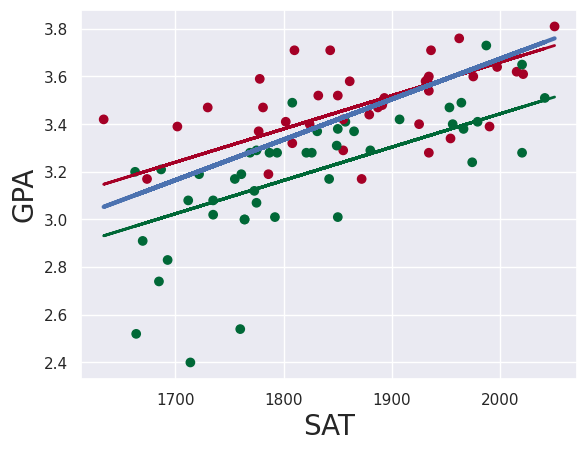

In [15]:
# Attendace is a constant 1 or 0 so --> so it is liek a constant has only 2 scenarios
# Now let's create both scenarios
# Attendance = 1 --> GPA = 0.8665 + 0.0014 * SAT
# Attendance = 1 --> GPA = 0.6439 + 0.0014 * SAT
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.86 + 0.0014 * data['SAT']
yhat = 0.0017 * data['SAT'] + 0.275
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='#006837', label='Attendance=No')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='#a50026', label='Attendance=Yes')
fig = plt.plot(data['SAT'],yhat, lw=3, c='#4C72B0', label='Original Regression')
fig = plt.xlabel('SAT',fontsize=20)
fig = plt.ylabel('GPA',fontsize=20)
plt.show()

In [16]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [17]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1600],'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1600,1


In [18]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1600,1


In [20]:
predictions = results.predict(new_data)
predictions

,0
0,3.023513
1,3.106177


In [21]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1600,1,3.106177
